In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


# Prepering Data

In [2]:
#from datetime import datetime

#df['start_time'] = [datetime.fromtimestamp(timestamp) for timestamp in df['start_time']]
#df['end_time'] = [datetime.fromtimestamp(timestamp) for timestamp in df['end_time']]
#print(df['start_time'])
#print(df['end_time'])
#df.to_csv('hour10 am of data.csv') 

In [3]:
df = pd.read_csv('data10am.csv')
df.head()

,worker_name,machine,start_time,end_time,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
0,b7011d3976a04c88edec0c6f542e85b5234226740f04ea...,8a7534c9afa24007a4964200,09/03/1970 10:00,09/03/1970 10:09,0.002343,1.009804,4.219145,15.650563,5.192952,6.057526e+07,2.300926,5.231291
1,7aabbe4d6bfe99c0b3be4c3a9ec717a86d8da64f3d4b69...,6d4081eda3214864147e1722,09/03/1970 10:00,09/03/1970 10:50,0.002796,4.011110,19.030606,61.502649,28.817300,2.408176e+08,4.603220,23.044512
2,bb5cacc26dbeb7d40be43476d80d63c3602ba52cbdd70f...,aaabedd165dde7ab20afc6fe,09/03/1970 10:00,09/03/1970 10:49,0.002636,3.065860,10.377267,110.091721,15.462709,2.109449e+08,3.828716,13.445763
3,f6b39efe1a7deab9d7286d940bb3831aba8eb562b95b47...,f4269b12456c38c6cdcfec5b,09/03/1970 10:00,09/03/1970 10:49,0.002680,2.541687,8.951814,55.141889,12.888397,4.465554e+07,3.652163,11.496180
4,ef77e2b55ea6777fb1eadbed2a3deb8ecea1064ea94c9c...,aea554ec08021e56e43cbedf,09/03/1970 10:00,09/03/1970 10:50,0.003254,3.107840,13.211442,57.592217,18.094636,7.719928e+07,4.701679,16.322536


In [4]:
# to display stats about data
df.describe()

,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1.450000e+03,1450.000000,1450.000000
mean,0.003772,5.589494,11.942693,63.494195,33.419761,2.125595e+08,5.130411,17.535958
std,0.007201,7.570901,13.009349,90.263348,71.317403,2.352950e+08,5.892876,18.911136
min,0.000525,0.508443,0.596306,0.147832,1.650440,4.368097e+06,0.466450,1.620186
25%,0.002611,1.522209,2.742584,7.970542,4.391447,5.035873e+07,1.502918,4.334616
50%,0.002757,2.119708,6.371914,25.103405,8.961348,1.096341e+08,2.604039,8.934284
75%,0.003361,6.096221,14.895786,85.425309,24.200085,3.156848e+08,4.857963,22.823158
max,0.247685,49.710632,55.777441,700.321970,625.490151,1.077898e+09,26.213119,86.583274


In [5]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
worker_name            1450 non-null object
machine                1450 non-null object
start_time             1450 non-null object
end_time               1450 non-null object
machine_cpu_iowait     1450 non-null float64
machine_cpu_kernel     1450 non-null float64
machine_cpu_usr        1450 non-null float64
machine_gpu            1450 non-null float64
machine_load_1         1450 non-null float64
machine_net_receive    1450 non-null float64
machine_num_worker     1450 non-null float64
machine_cpu            1450 non-null float64
dtypes: float64(8), object(4)
memory usage: 136.0+ KB


In [6]:
# to display no. of samples on each class
df['machine_cpu'].value_counts()

3.947691     4
1.934307     3
3.855427     3
40.224139    3
8.390099     3
10.709624    3
11.549769    3
75.292825    2
3.972499     2
55.185493    2
9.569723     2
23.820663    2
62.936415    2
12.866311    2
1.928764     2
55.160205    2
3.328554     2
4.309079     2
2.418082     2
24.712660    2
23.821375    2
47.407498    2
20.079645    2
2.251038     2
55.367331    2
3.639490     2
11.113364    2
3.893924     2
5.802678     2
23.817313    2
            ..
39.463437    1
55.174629    1
46.862107    1
26.258384    1
2.892537     1
44.238232    1
18.889062    1
5.000938     1
2.778932     1
18.896062    1
47.022089    1
3.375427     1
4.465370     1
4.999347     1
4.137742     1
10.826938    1
8.951060     1
60.775152    1
3.302615     1
12.436808    1
4.501801     1
48.289416    1
18.984888    1
3.857886     1
8.341125     1
26.499604    1
4.574435     1
17.328424    1
3.941400     1
63.611608    1
Name: machine_cpu, Length: 1393, dtype: int64

In [7]:
# to display no. of samples on each class
df['machine'].value_counts()

23fadb2a32734936d5750c30    17
405d86056a38bc086a130c73    16
6ceff750507f08f5793a776e    11
a7b176fae0484361e5360f5f     8
859f2e40213375bd3c717e03     8
0a20cc6112bd7796a1143fbe     7
15039551336347a7df6db1e9     7
b23478c84c138906a1ffd1c1     7
64a4600d0b741de57a31e3fd     7
70863dec56a44d43d9c77ba7     7
905f98d511a6d16771b596d7     7
f7463287bb20a802d3054f5f     7
1dd738936365aa420b44dba1     7
8ce2de6261fc0e6e5c61108e     7
171aa25237b0956387f8872f     7
0c96ed69396cb2b7a4e62768     7
91c8c202d797d341235ee765     6
965e401acd661127a3fdd69d     6
4837147d5ecdf8a81109cbf9     6
0a6a013071feb8c0d4f4d8f6     6
033a61c97648ebeae1fabc1f     6
f2066c593db5b30ed0a336fd     6
8a7534c9afa24007a4964200     6
120ae6e2cca223c2d1dea59d     6
f504353e74e59fffdc668d31     6
6d8e7f76a8bb61d1e5f302b2     6
28a2ff7e7bfd4bca69b60a68     6
048d883ff19276ad62189797     6
f17193c489240186da13cd05     6
b0691a3a0c04dabd09d94f3b     6
                            ..
330c31884b912a9a04c32a44     1
f9deddea

In [8]:
# check for null values
df.isnull().sum()

worker_name            0
machine                0
start_time             0
end_time               0
machine_cpu_iowait     0
machine_cpu_kernel     0
machine_cpu_usr        0
machine_gpu            0
machine_load_1         0
machine_net_receive    0
machine_num_worker     0
machine_cpu            0
dtype: int64

In [9]:
df.corr()

,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
machine_cpu_iowait,1.000000,0.025128,0.057453,0.150213,-0.006512,0.052481,0.048713,0.049964
machine_cpu_kernel,0.025128,1.000000,0.665309,0.417691,0.887555,0.568254,0.587149,0.858030
machine_cpu_usr,0.057453,0.665309,1.000000,0.623823,0.632761,0.805965,0.933225,0.954292
machine_gpu,0.150213,0.417691,0.623823,1.000000,0.390216,0.534880,0.627356,0.596416
machine_load_1,-0.006512,0.887555,0.632761,0.390216,1.000000,0.528249,0.555892,0.790611
machine_net_receive,0.052481,0.568254,0.805965,0.534880,0.528249,1.000000,0.767366,0.781955
machine_num_worker,0.048713,0.587149,0.933225,0.627356,0.555892,0.767366,1.000000,0.877063
machine_cpu,0.049964,0.858030,0.954292,0.596416,0.790611,0.781955,0.877063,1.000000


<AxesSubplot:>

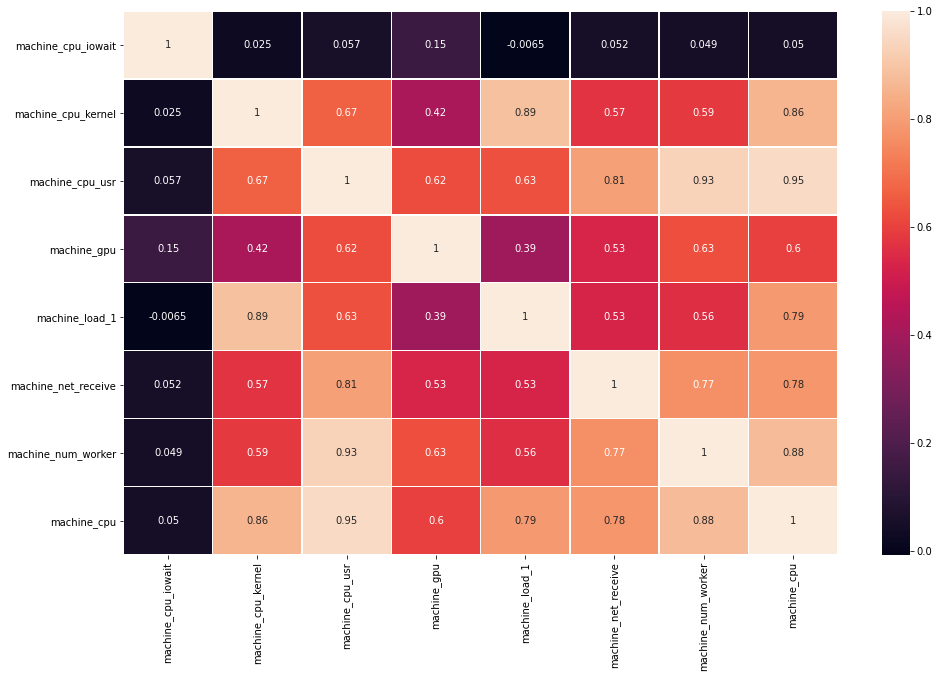

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr, annot=True,linewidths=.5,ax=ax)

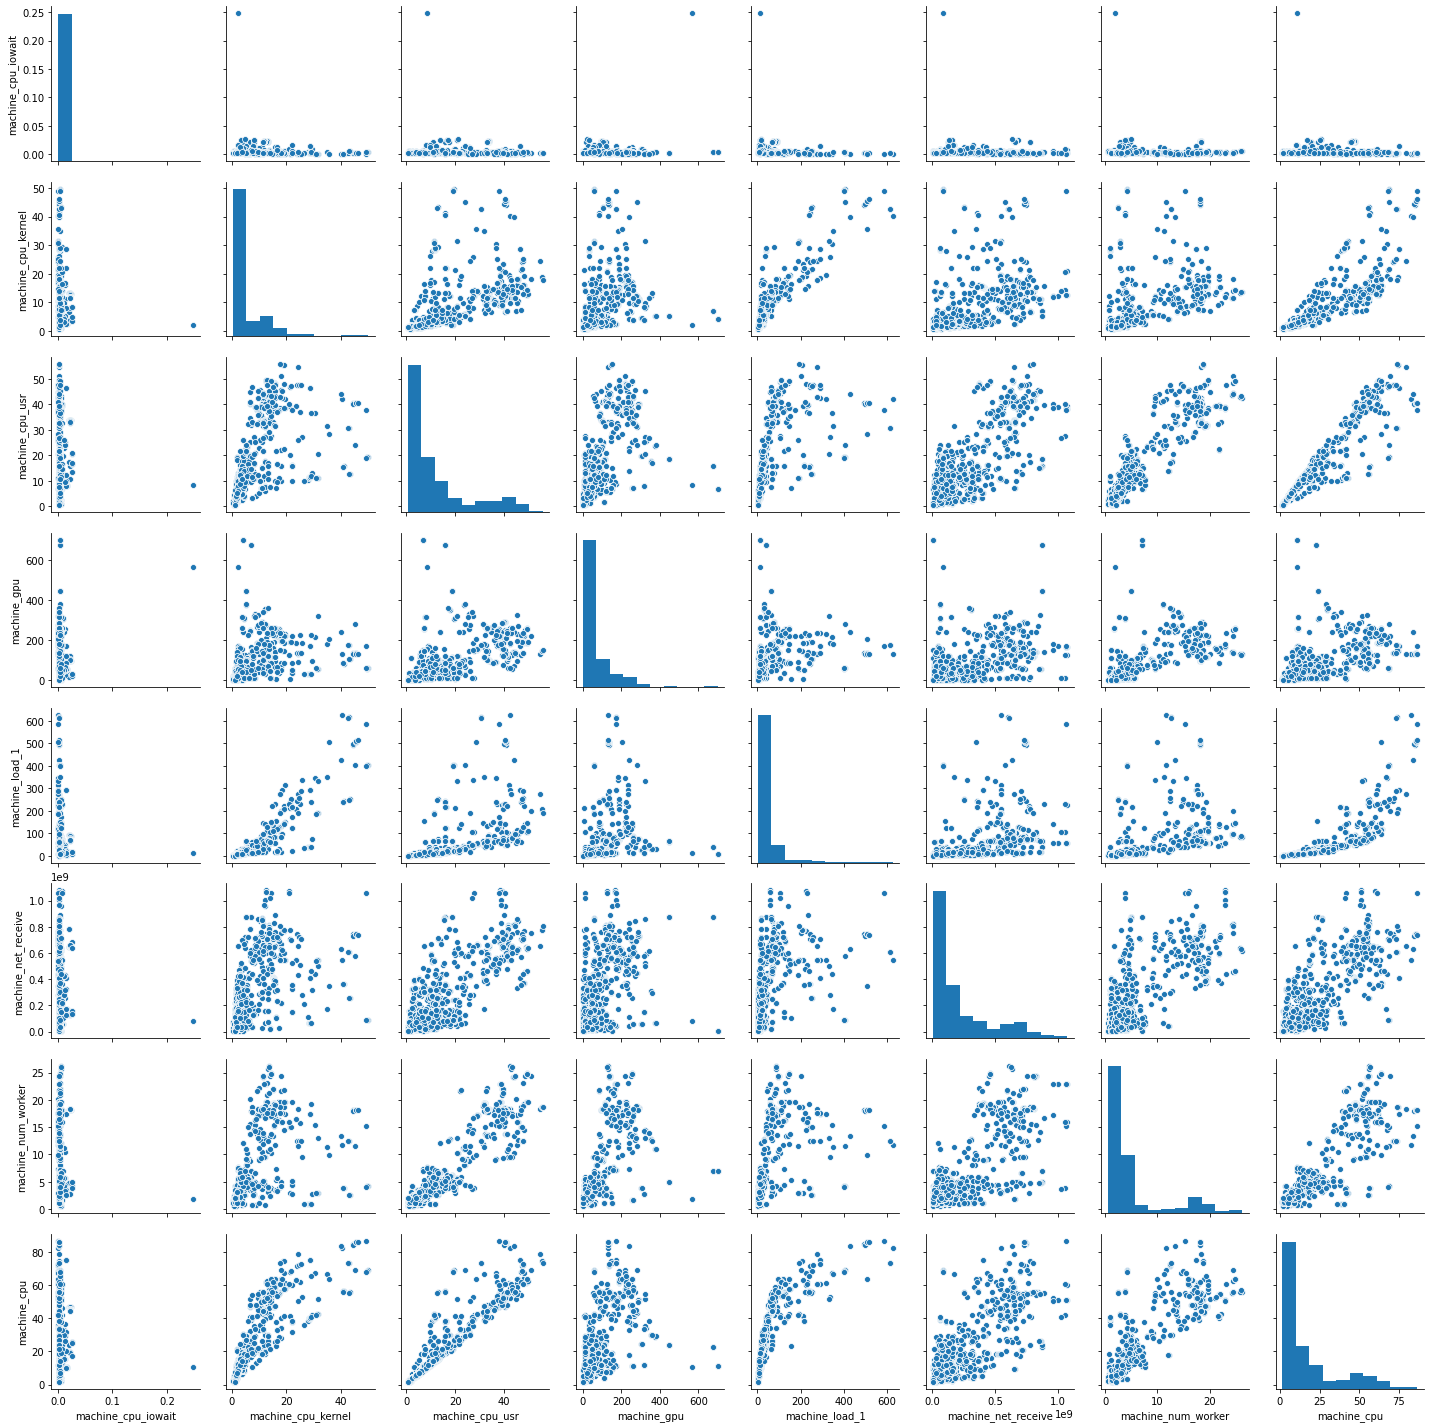

In [11]:
sns.pairplot(data = df)

Text(0, 0.5, 'machine_cpu')

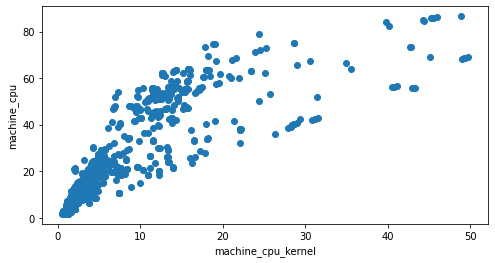

In [12]:
fig , ax=plt.subplots(figsize=(8,4))
ax.scatter(x=df['machine_cpu_kernel'],y=df['machine_cpu'])
ax.set_xlabel('machine_cpu_kernel')
ax.set_ylabel("machine_cpu")

Text(0, 0.5, 'machine_cpu')

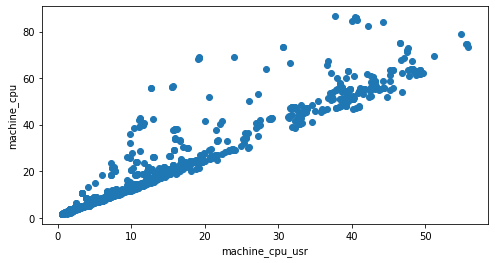

In [13]:
fig , ax=plt.subplots(figsize=(8,4))
ax.scatter(x=df['machine_cpu_usr'],y=df['machine_cpu'])
ax.set_xlabel('machine_cpu_usr')
ax.set_ylabel("machine_cpu")

In [14]:
df = df[['machine_cpu_iowait','machine_cpu_kernel','machine_cpu_usr','machine_gpu','machine_load_1','machine_net_receive','machine_num_worker','machine_cpu']]

In [15]:
from scipy.stats import zscore
df = df.apply(zscore)
df.head()

,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
0,-0.198477,-0.605116,-0.593897,-0.530228,-0.395928,-0.646154,-0.480319,-0.650882
1,-0.135476,-0.208552,0.545020,-0.022071,-0.064557,0.120138,-0.089493,0.291387
2,-0.157825,-0.333448,-0.120372,0.516418,-0.251877,-0.006865,-0.220969,-0.216360
3,-0.151673,-0.402708,-0.229982,-0.092565,-0.287986,-0.713836,-0.250940,-0.319487
4,-0.071860,-0.327902,0.097560,-0.065409,-0.214960,-0.575477,-0.072780,-0.064187


# Splitting Data

In [16]:
df.head()

,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
0,-0.198477,-0.605116,-0.593897,-0.530228,-0.395928,-0.646154,-0.480319,-0.650882
1,-0.135476,-0.208552,0.545020,-0.022071,-0.064557,0.120138,-0.089493,0.291387
2,-0.157825,-0.333448,-0.120372,0.516418,-0.251877,-0.006865,-0.220969,-0.216360
3,-0.151673,-0.402708,-0.229982,-0.092565,-0.287986,-0.713836,-0.250940,-0.319487
4,-0.071860,-0.327902,0.097560,-0.065409,-0.214960,-0.575477,-0.072780,-0.064187


In [17]:
y=df['machine_cpu'].values

In [18]:
xx = df[['machine_cpu_kernel','machine_cpu_usr']]
xx.head()

,machine_cpu_kernel,machine_cpu_usr
0,-0.605116,-0.593897
1,-0.208552,0.545020
2,-0.333448,-0.120372
3,-0.402708,-0.229982
4,-0.327902,0.097560


In [19]:
x=xx.values

In [20]:
y=y.reshape(-1,1)

In [21]:
xtrain , xtest , ytrain, ytest =train_test_split(x,y,test_size=0.2,random_state=42 )

In [22]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (1160, 2)
xtest shape  :  (290, 2)
ytrain shape :  (1160, 1)
ytest shape  :  (290, 1)


In [23]:
df.head()

,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
0,-0.198477,-0.605116,-0.593897,-0.530228,-0.395928,-0.646154,-0.480319,-0.650882
1,-0.135476,-0.208552,0.545020,-0.022071,-0.064557,0.120138,-0.089493,0.291387
2,-0.157825,-0.333448,-0.120372,0.516418,-0.251877,-0.006865,-0.220969,-0.216360
3,-0.151673,-0.402708,-0.229982,-0.092565,-0.287986,-0.713836,-0.250940,-0.319487
4,-0.071860,-0.327902,0.097560,-0.065409,-0.214960,-0.575477,-0.072780,-0.064187


# Support vector regression

In [24]:
from sklearn.svm import SVR


In [25]:
# from sklearn.model_selection import train_test_split
# train - 80
# test - 20K
x = df[['machine_cpu_kernel','machine_cpu_usr']]
y = df[['machine_cpu']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [26]:
regressor = SVR() 
model=regressor.fit(xtrain, ytrain) 

# predicting the test set results 
y_pred = regressor.predict(xtest) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
#How to predict for new input:
#create a new input:

def newPrediction(kernal, user):
    
    newInput = np.array([(kernal, user)])
    #print('New input: ', newInput)

    newPred = regressor.predict(newInput) 
    #print('Predicted value: ', newPred)
    return newPred


In [28]:
print(newPrediction(-0.081169,4.921983))

[1.76601734]


In [30]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.9971773431719083

In [31]:
modelresult = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten().round(2), 'Differences':ytest.flatten() - y_pred.flatten().round(2) })

In [32]:
modelresult

,Actual,Predicted,Differences
0,-0.471027,-0.55,0.078973
1,0.205618,0.19,0.015618
2,-0.753619,-0.73,-0.023619
3,0.180080,0.16,0.020080
4,-0.569652,-0.64,0.070348
5,-0.690755,-0.71,0.019245
6,1.979960,1.99,-0.010040
7,-0.759761,-0.73,-0.029761
8,1.470190,1.50,-0.029810
9,0.471353,0.47,0.001353


# Plotting result

### Line plot of complete Data

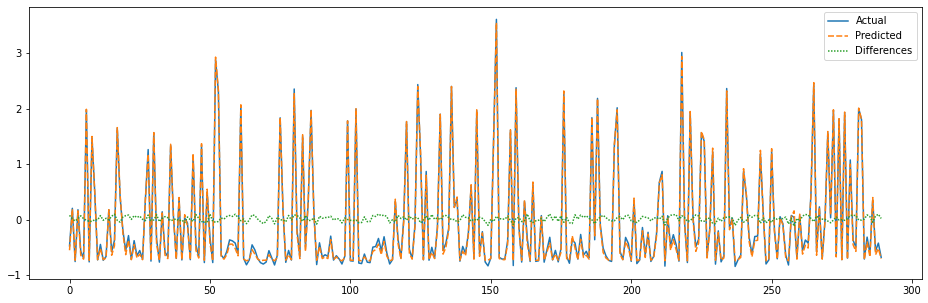

In [33]:
#modelresult.plot(kind='bar',figsize=(16,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()
plt.figure(figsize=(16,5))
ax = sns.lineplot(data=modelresult)

### Line plot of top 200 Data rows

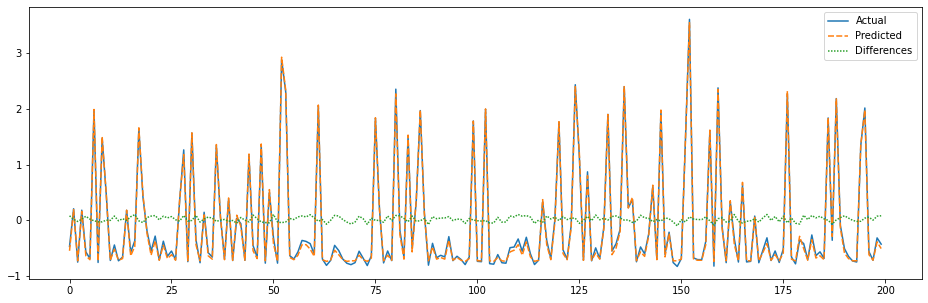

In [34]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(data=modelresult.head(200))

### Bar plot of Top 50 Data rows

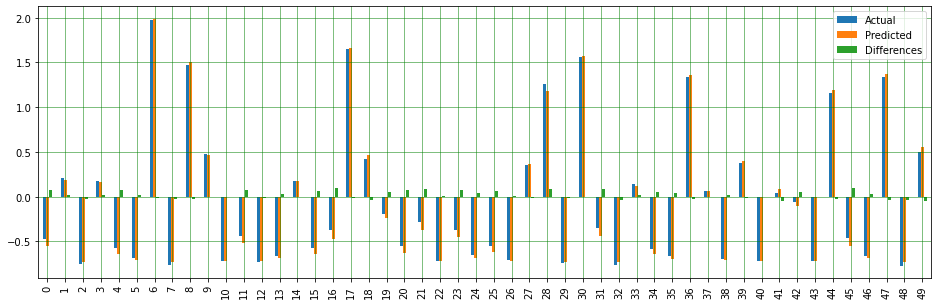

In [35]:
modelresult.head(50).plot(kind='bar',figsize=(16,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Estimating MSE, MAE

In [36]:
#print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  

Mean Absolute Error: 0.04135121799201851
